In [12]:
#loading data-set
from scipy.io import arff
file_path ='datasets/mnist_784.arff'
data,meta = arff.loadarff(file_path)

In [13]:
#converting arff to a pandas dataframe
import numpy as np
import pandas as pd

mnist_df = pd.DataFrame(data)
mnist_df.shape

(70000, 785)

In [14]:
#splitting dataframe to target 
mnist_target_df = mnist_df.iloc[:,-1]
mnist_target_df

0        b'5'
1        b'0'
2        b'4'
3        b'1'
4        b'9'
         ... 
69995    b'2'
69996    b'3'
69997    b'4'
69998    b'5'
69999    b'6'
Name: class, Length: 70000, dtype: object

In [15]:
#splitting dataframe to pixels 
mnist_pixels_df = mnist_df.iloc[:,:-1]
mnist_pixels_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
print(mnist_pixels_df.shape)
print(mnist_target_df)

(70000, 784)
0        b'5'
1        b'0'
2        b'4'
3        b'1'
4        b'9'
         ... 
69995    b'2'
69996    b'3'
69997    b'4'
69998    b'5'
69999    b'6'
Name: class, Length: 70000, dtype: object


In [38]:
#1D and 2D NumPy arrays
X = mnist_pixels_df.values
y = np.array([float(item.decode('utf-8'))for item in mnist_target_df])

In [39]:
#Importing functions to plot the numbers
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [87]:
#Picking a random number for plotting
some_digit = X[34021]
#reshaping the number to a 28x28 grid
some_digit_image = some_digit.reshape(28,28)

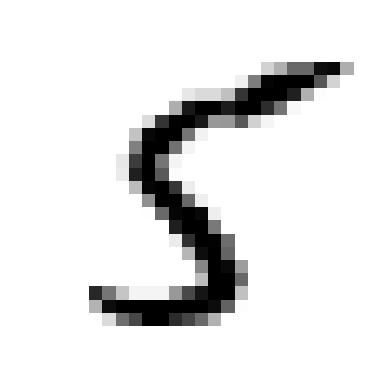

In [88]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, 
           interpolation="nearest")
plt.axis("off")
plt.show()

In [90]:
target_digit = y[34021]
target_digit

5.0

In [91]:
#separando o conjunto de treino e de teste
X_train, X_test, y_train, y_test = X[:60000],X[60000:], y[:60000], y[60000:]

In [92]:
#embaralhando o conjunto de treinamento para validação cruzada
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [93]:
#Classificador binário
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [94]:
#SGD do scikit-learn
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [95]:
sgd_clf.predict([some_digit])

array([ True])

In [102]:
#Medindo acurácia com validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    #clonando o classificador a cada iteração 
    clone_clf = clone(sgd_clf)

    #Separando 40000 e 20000 instancias estratificadas para treinamento e teste respect.
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    #ajustando o conjunto de treinamento ao clone atual do classificador
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)

    #quantidade total de acertos é calculada para todo o conjunto de predição e o conjunto alvo
    n_correct = sum(y_pred == y_test_fold)

    #total de acertos sobre total de predições
    print(n_correct / len(y_pred)) 



0.94995
0.91045
0.95845


In [107]:
#utilizando score de validação cruzada para medir o desempenho para 3-folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
#acurácia geralmente não é um bom medidor de desempenho para classificadores

array([0.95735, 0.96895, 0.96245])

In [109]:
#medindo desempenho com Matriz de confusão
from sklearn.model_selection import cross_val_predict

#separando conjunto de previsão para comparar com os alvos reais 
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred.dtype

dtype('bool')

In [111]:
#utilizando os conjuntos de previsão aplicados na matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
#a diagonal principal expressa os valores corretamente classificados
#primeira linha (não 5)
#segunda linha (imagem 5)

array([[53584,   995],
       [ 1230,  4191]], dtype=int64)

In [115]:
#métrica de precisão e revocação da matriz de confusão:
from sklearn.metrics import precision_score, recall_score

print("precision: ", precision_score(y_train_5, y_train_pred), "recall: ", recall_score(y_train_5, y_train_pred))



precision:  0.8081372927111454 recall:  0.7731045932484781


In [116]:
#pontuiação F1 é a média harmônica da precisão e da revocação com peso muito maior aos valores mais baixos
#apenas obtém melhor pontuação caso a precisão e revocação sejam altas

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7902328650890921